<a href="https://colab.research.google.com/github/siddugoud6966/AIML-LAB-2024/blob/main/AIML_LAB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car',version=2,parser='auto')

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [5]:
car_data.details['version']

'2'

In [6]:
#Data description
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
#Displaying future names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [8]:
#Getting the whole dataframe

car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [9]:
type(car_data)

pandas.core.frame.DataFrame

# Spliting Data into Training and Test sets

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(car_data, test_size=0.3,random_state=20)
print('The size of training data is:{}\nThe size of testing data is:{}'.format(len(train_data),len(test_data)))

The size of training data is:1209
The size of testing data is:519


**checking summary statistics**

In [18]:
#checking missing values
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

In [14]:
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

In [15]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

In [16]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

In [17]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

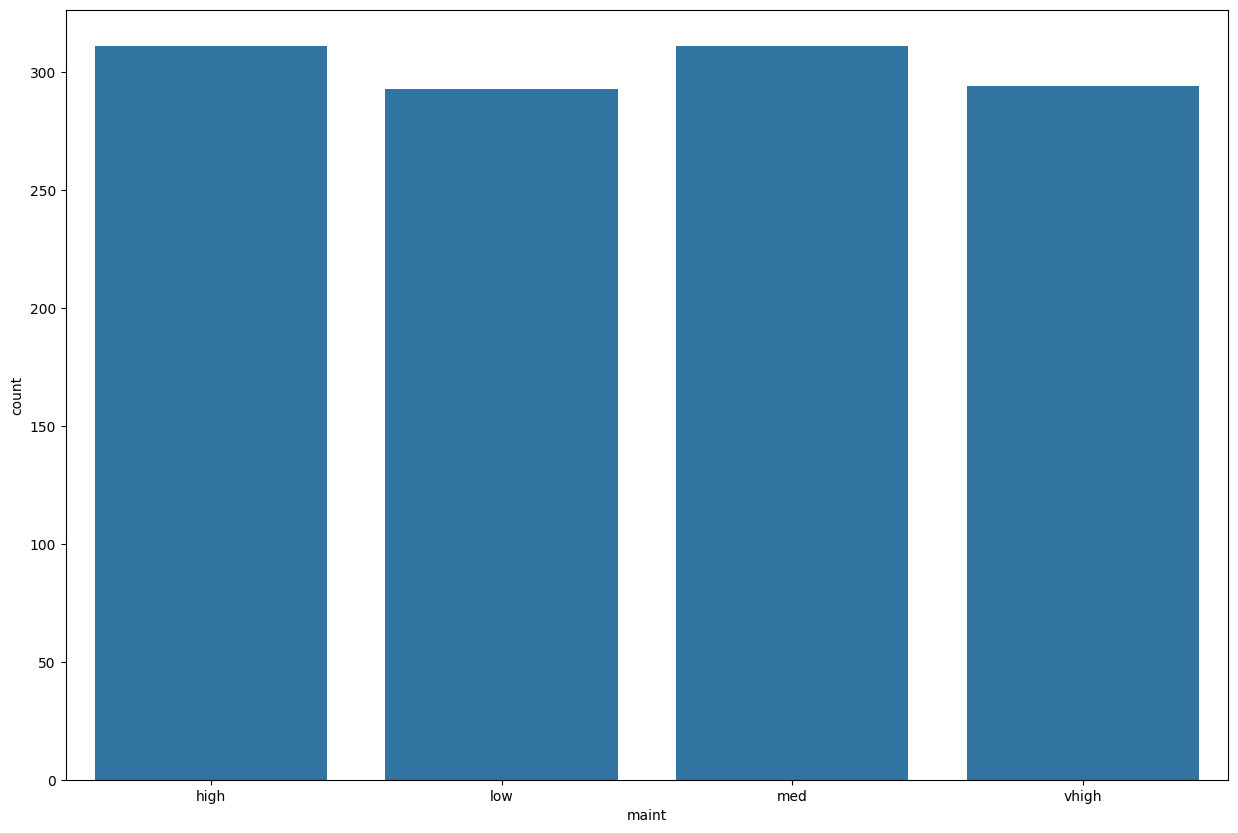

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='buying', ylabel='count'>

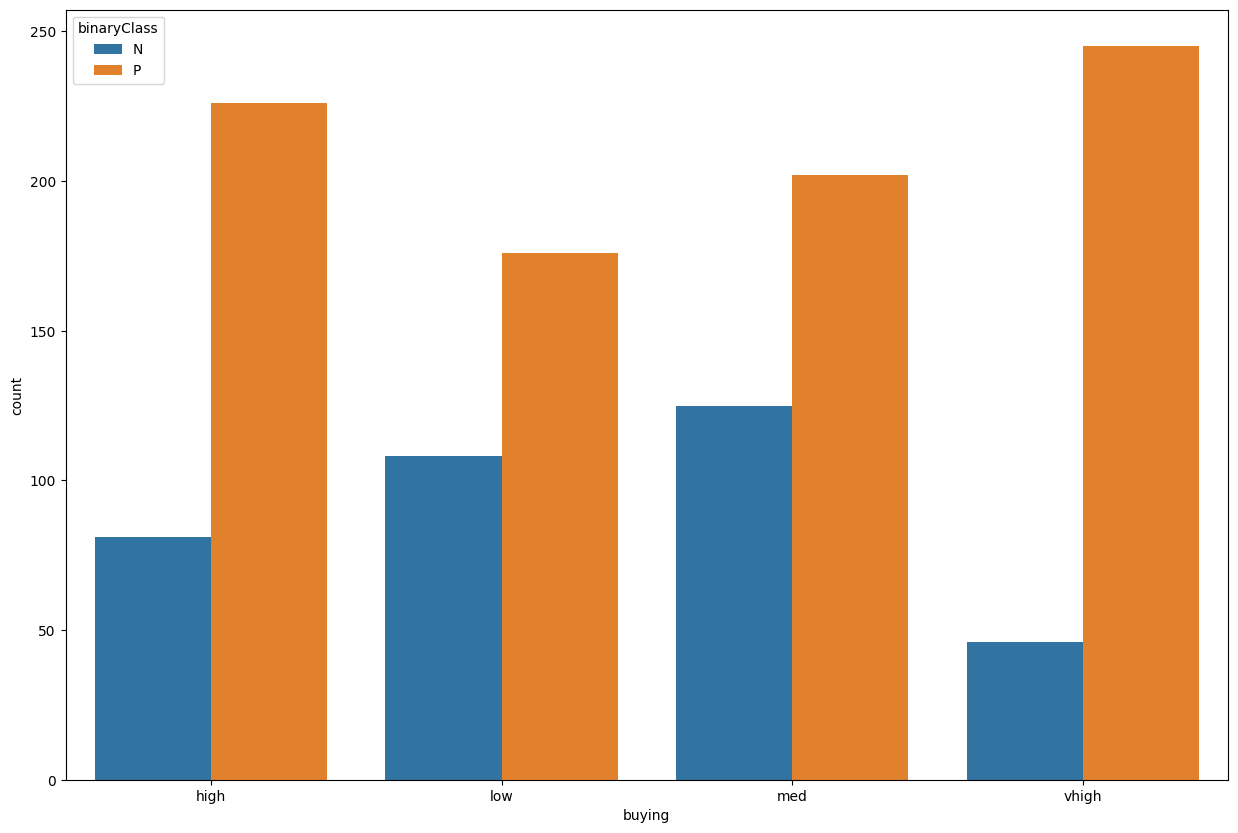

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying',hue='binaryClass')

In [23]:
train_data['safety'].value_counts()

med     406
low     402
high    401
Name: safety, dtype: int64

In [24]:
car_train = train_data.drop('binaryClass',axis=1)
car_labels = train_data[('binaryClass')]

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared= pipe.fit_transform(car_train)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [36]:
text_representation=tree.export_text(tree_clf)
print(text_representation)

NameError: name 'tree' is not defined

In [37]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc